Before you turn this problem in, make sure everything runs as expected. First, **restart the kernel** (in the menubar, select Kernel$\rightarrow$Restart) and then **run all cells** (in the menubar, select Cell$\rightarrow$Run All).

Make sure you fill in any place that says `YOUR CODE HERE` or "YOUR ANSWER HERE", as well as your name and collaborators below:

In [12]:
NAME = "Gasper Bizjan"

---

## Assignment 8 - local P1-Basis Class

This assignment is about the local P1-Basis on the reference triangle given by the degrees of freedom $(\hat{x}_0,\hat{y}_0)=(0,0)$ , $(\hat{x}_1,\hat{y}_1)=(1,0)$ and $(\hat{x}_2,\hat{y}_2)=(0,1)$. The local basis functions $\hat{\phi}_i$ should be linear and fullfil the lagrangian condition 

$$
\hat{\phi}_i (\hat{x}_j,\hat{y}_j) = \delta_{ij}
$$
as in the lecture $7$. 

### 8.1 The Basis Object

Write a python class ```Basis``` which represents the linear local basis on the reference triangle. The constructor has no input. <br><b>All the further functions have to be defined inside of the class.</b> 

#### 8.1.1 evalPhi

Write a property ```evalPhi``` which is the evaluation of the three basis functions $\hat{\phi}_i$ on a set of points in the reference Element. <br>
<b>INPUT</b>: ```xHat```, set of $N_p$ points in the reference element as ```np.array([ [x1,y1] , [x2 , y2] , ... ])``` of shape $N_p \times 2$.   <br>
<b>OUTPUT</b>: ```np.ndarray``` of shape $N_p \times 3$

Hints:<br> 
$(\hat{x}_j , \hat{y}_j) = $ ```xHat[j,:]```<br>
$\hat{\phi}_i(\hat{x}_j,\hat{y}_j) = $ ``` evalPhi(xHat)[j,i] ```

#### 8.1.2 evalGradPhi
Write a property ```evalGradPhi``` which is the evaluation of the gradient of the three basis function $\nabla\hat{\phi}_i$ on a set of points. <br>
<b>INPUT</b>: ```xHat```, set of $N_p$ points in the reference element as ```np.array([ [x1,y1] , [x2 , y2] , ... ])``` of shape $N_p \times 2$.   <br>
<b>OUTPUT</b>: ```np.ndarray``` of shape $N_p \times 3 \times 2$
<br><br>

Hints:<br> 
$(\hat{x}_j , \hat{y}_j) = $ ```xHat[j,:]```<br>
$\partial_k\hat{\phi}_i(\hat{x}_j,\hat{y}_j) = $ ``` evalGradPhi(xHat)[j,i,k] ``` 


#### 8.1.3 Visualizing 
Add a property ```show``` that visulizes the local basis $\hat{\phi} = \sum_{i=0}^2 \hat{u}_i\hat{\phi}_i$ with respect to a local Dof-Vector $\hat{u}$. <br>
<b>INPUT</b>: ```uHat```, local Dof-Vector $\hat{u}$ as ```np.array([ u0,u1,u2 ])```.   <br>



In [16]:
# YOUR CODE HERE
# YOUR CODE HERE
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
plt.rcParams["figure.figsize"] = [8, 8]

class Basis():
    #def __init__(self):
        #pass
        #self.PhiHat = np.array([], dtype=np.int64)
        #self.GradPhiHat = np.array([], dtype=np.int64)
    
    def evalPhi(self, xHat):
        N = np.shape(xHat)[0]
        phi = np.zeros((N,3))
        phi[:,0] = 1 - xHat[:,0] - xHat[:,1]
        phi[:,1] = xHat[:,0]
        phi[:,2] = xHat[:,1]
        return phi
        
    def evalGradPhi(self, xHat):
        N = np.shape(xHat)[0]
        gradPhi = np.zeros((N,3,2))
        gradPhi[:,0,0]=-1
        gradPhi[:,0,1]=-1
        gradPhi[:,1,0]=1
        gradPhi[:,1,1]=0
        gradPhi[:,2,0]=0
        gradPhi[:,2,1]=1
        return gradPhi
        
    
    def show(self, uHat):
        fig = plt.figure()
        ax = fig.add_subplot(1,1,1,projection='3d')
        xHat = np.array([[0,0],[0,1],[1,0]])
        phi = self.evalPhi(xHat)
        ax.plot_trisurf(xHat[:,0], xHat[:,1], phi.dot(uHat))
        ax.set_xlabel(r'$\hat x$')
        ax.set_ylabel(r'$\hat y$')
        ax.set_zlabel(r'$\hat\Phi(\hatx,\haty)$')
        plt.show()

In [17]:
b = Basis()
print(b.evalPhi(np.array([[0,0],[1,0],[0,1]])))
print(b.evalGradPhi(np.array([[0,0],[1,0],[0,1]])))


[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]
[[[-1. -1.]
  [ 1.  0.]
  [ 0.  1.]]

 [[-1. -1.]
  [ 1.  0.]
  [ 0.  1.]]

 [[-1. -1.]
  [ 1.  0.]
  [ 0.  1.]]]


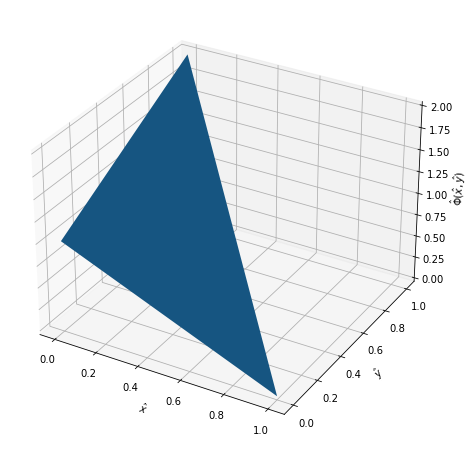

In [18]:
b = Basis()
b.show(np.array([1,0,2]))